# Análisis descriptivo

El objetivo de este documento es hacer un análisis descriptivo de una base de datos que simula las transacciones de un banco.
En las siguientes líneas se lee el archivo. Primero importamos las librerías que se van a usar a lo largo del documento.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
data = pd.read_csv("AML-SIM_2/bank_mixed/transactions.csv")

## Exploración de los datos
Es importante conocer las características de los datos, es decir, las dimensiones de la base de datos, el número de transacciones, los nombres de las columnas y además en R existe una función predefinida que hace un resumen estadístico de las variables numéricas. Se simulan 885,744 transacciones de tres diferentes bancos.

In [3]:
summary = data.describe()
print(summary)

             tran_id      orig_acct      bene_acct       base_amt  \
count  885744.000000  885744.000000  885744.000000  885744.000000   
mean   442872.500000   10030.261040   10170.996494     293.337742   
std    255692.412755    5765.977568    5763.702492     732.809987   
min         1.000000       0.000000       1.000000      45.000000   
25%    221436.750000    5044.000000    5051.000000      47.830000   
50%    442872.500000   10041.000000    9998.000000      50.670000   
75%    664308.250000   15018.000000   14999.000000      53.500000   
max    885744.000000   19999.000000   19999.000000    2996.940000   

            alert_id  
count  885744.000000  
mean       -0.952767  
std         1.753964  
min        -1.000000  
25%        -1.000000  
50%        -1.000000  
75%        -1.000000  
max        99.000000  


Son ocho columnas y las estadísticas de cada una de ellas.
- $\textit{tran_id}$, se refiere al id de la transacción.
- $\textit{orig_acct}$, se refiere al id de la cuenta origen de la transacción.
- $\textit{bene_act}$, es la cuenta que recibe la transacción.
- $\textit{tx_type}$, se refiere al tipo de transacción.
- $\textit{base_amt}$, es la cantidad que se transfiere en cada transacción.
- $\textit{tran_timestamp}$, es la fecha cuando se realizó la transacción.
- $\textit{is_sar}$, advierte si la transacción es de lavado de dinero o no (es un valor booleano).
- $\textit{alert_id}$, es el id de alerta.

## Análisis de la variable "tran_timestamp"
El formato de las fechas ya viene en orden: "año-mes-día".

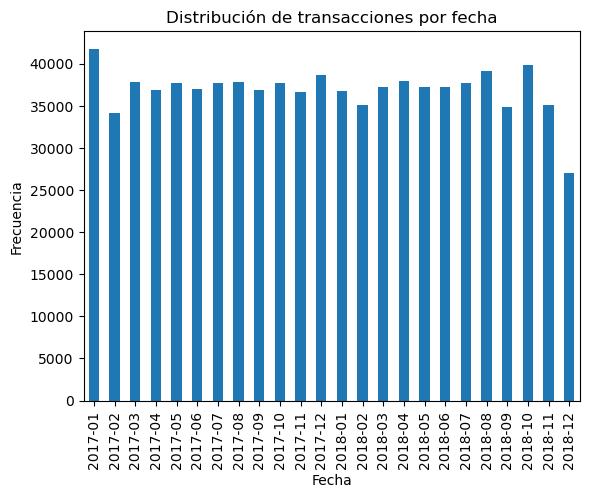

In [10]:
warnings.filterwarnings("ignore")
data['tran_timestamp'] = pd.to_datetime(data['tran_timestamp'])
data['tran_timestamp'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.title('Distribución de transacciones por fecha')
plt.show()

Podemos inferir que la variable aleatoria de las transacciones por fecha se distribuye uniforme en el intervalo de las fechas entre 2017-01 y 2018-12.

## Análisis de la variable "base_amt"
El análisis de esta variable va a ser muy útil para poder tener una idea de cómo son simuladas las transacciones en este proyecto.

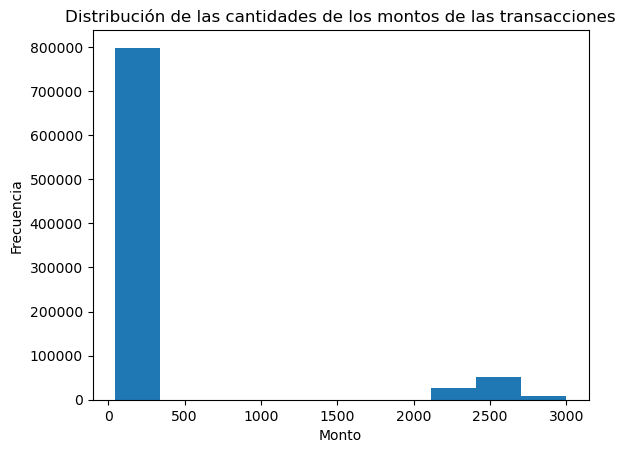

In [12]:
plt.hist(data['base_amt'])
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.title('Distribución de las cantidades de los montos de las transacciones')
plt.show()

En este caso, podemos observar que no hay como tal una distribución que podríamos inferir que le pertenece a esta variable aleatoria. Se podría asimilar a una distribución exponencial, pero no hay forma de asegurar esto. Vemos que la mayoría de los resultados se encuentan pegadas a la columna de la izquierda y hay unos valores atípicos hacia la derecha.

## Análisis de la variable "is_ar"
Este análisis muestra las magnitud de cuentas que son de lavado de dinero, contra las que no son.

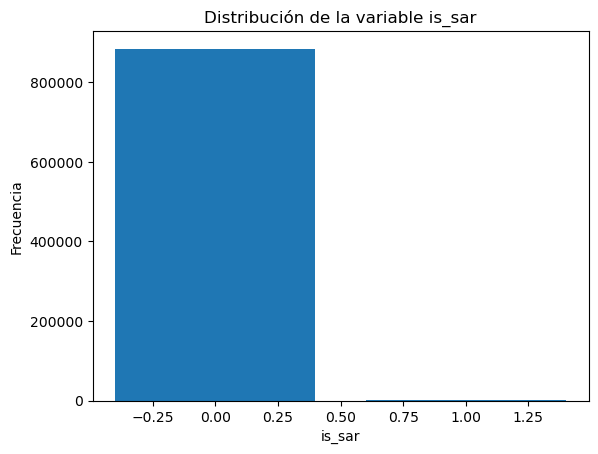

In [13]:
plt.bar(data['is_sar'].unique(), data['is_sar'].value_counts())
plt.xlabel('is_sar')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable is_sar')
plt.show()

En este caso se debe tener precaución al desarrollar el algoritmo, ya que si se hacen pruebas que no tomen en cuenta la información anterior, los resultados podrían reflejar que el algoritmo es muy eficiente diciendo cuáles transacciones no son de alerta, mientras que la realidad es que el algoritmo sea muy malo.